# Week 3 lab Normal distribution

In this tutorial we'll investigate the probability distribution that is most central to statistics: the normal distribution. If we are confident that our data are nearly normal, that opens the door to many powerful statistical methods. Here we'll use the graphical tools of Python to assess the normality of a dataset and also learn how to generate random numbers from a normal distribution.

## The data

Here we'll be working with measurements of body dimensions. This data set contains measurements from 247 men and 260 women, most of whom were considered healthy young adults.

In [1]:
import numpy as np
import pandas as pd

bdims = pd.read_csv('bdims.csv')

Let's take a quick peek at the first few rows of the data.

In [2]:
# set the display options to be unlimited to show all rows from the dataframe in the output
pd.set_option('display.max_columns', None)

# .shape indicates the (rows, columns) in the DataFrame bdims
print(bdims.shape)

# display the first five rows in the Dataframe
bdims.head(5)

(507, 25)


,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,che.gi,wai.gi,nav.gi,hip.gi,thi.gi,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,89.5,71.5,74.5,93.5,51.5,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,97.0,79.0,86.5,94.8,51.5,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,97.5,83.2,82.9,95.0,57.3,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,97.0,77.8,78.8,94.0,53.0,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,97.5,80.0,82.5,98.5,55.4,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


In [3]:
pd.set_option('display.max_rows', None)
bdims

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,che.gi,wai.gi,nav.gi,hip.gi,thi.gi,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,89.5,71.5,74.5,93.5,51.5,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,97.0,79.0,86.5,94.8,51.5,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,97.5,83.2,82.9,95.0,57.3,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,97.0,77.8,78.8,94.0,53.0,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,97.5,80.0,82.5,98.5,55.4,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
5,43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,99.9,82.5,80.1,95.3,57.5,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1
6,43.5,30.0,34.0,21.9,31.7,16.1,12.5,20.8,15.6,123.5,106.9,82.0,84.0,101.0,60.9,42.4,32.3,40.1,40.3,23.6,18.8,26,86.4,184.0,1
7,44.4,29.8,33.2,21.8,28.8,15.1,11.9,21.0,14.6,120.4,102.5,76.8,80.5,98.0,56.0,34.1,28.0,39.2,36.7,22.5,18.0,27,78.4,184.5,1
8,43.5,26.5,32.1,15.5,27.5,14.1,11.2,18.9,13.2,111.0,91.0,68.5,69.0,89.5,50.0,33.0,26.0,35.5,35.0,22.0,16.5,23,62.0,175.0,1
9,42.0,28.0,34.0,22.5,28.0,15.6,12.0,21.1,15.0,119.5,93.5,77.5,81.5,99.8,59.8,36.5,29.2,38.3,38.6,22.2,16.9,21,81.6,184.0,1


You'll see that for every observation we have 21 measurements, many of which are either diameters or girths. A key to the variable names can be found [here](https://www.openintro.org/book/statdata/?data=bdims), but we'll be focusing on just three columns to get started: weight in kg (`wgt`), height in cm (`hgt`), and `sex` (1 indicates male, 0 indicates female).

Since men and women tend to have different body dimensions, it will be useful to create two additional data sets: one with only men and another one with only women.

In [4]:
mdims = bdims[bdims['sex'] == 1]
fdims = bdims[bdims['sex'] == 0]

In [5]:
print(mdims.shape)

(247, 25)


In [6]:
print(fdims.shape)

(260, 25)


In [7]:
mdims.describe()

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,che.gi,wai.gi,nav.gi,hip.gi,thi.gi,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.0
mean,41.241296,28.091498,32.526721,20.806478,29.948988,14.457085,11.246154,19.561943,14.744130,116.501619,100.989879,84.533198,87.662348,97.763158,56.497976,34.403644,28.240486,37.195547,37.206883,23.159109,17.190283,31.668016,78.144534,177.745344,1.0
std,2.087164,2.067098,1.865131,2.143633,2.083108,0.882543,0.635897,1.071361,0.944236,6.498023,7.209018,8.782241,8.384878,6.228043,4.246667,2.982037,1.779325,2.272999,2.645135,1.729088,0.907997,10.151450,10.512890,7.183629,0.0
min,34.100000,19.400000,27.500000,14.400000,24.700000,12.400000,9.800000,16.900000,12.300000,100.200000,79.300000,67.100000,67.000000,81.500000,46.800000,25.600000,22.700000,31.100000,28.900000,16.400000,14.600000,18.000000,53.900000,157.200000,1.0
25%,40.000000,26.800000,31.400000,19.350000,28.650000,13.800000,10.800000,18.800000,14.200000,112.200000,95.950000,77.900000,81.550000,93.250000,53.700000,32.500000,27.100000,35.750000,35.500000,22.000000,16.500000,24.000000,70.950000,172.900000,1.0
50%,41.200000,28.000000,32.400000,20.600000,29.900000,14.400000,11.200000,19.500000,14.800000,116.500000,101.000000,83.400000,87.300000,97.400000,56.000000,34.400000,28.400000,37.000000,37.300000,23.000000,17.100000,29.000000,77.300000,177.800000,1.0
75%,42.600000,29.450000,33.800000,22.100000,31.400000,15.100000,11.650000,20.400000,15.300000,121.000000,106.050000,90.000000,92.700000,101.550000,59.150000,36.400000,29.400000,38.450000,38.950000,24.300000,17.850000,37.000000,85.500000,182.650000,1.0
max,47.400000,34.700000,38.000000,27.500000,35.600000,16.700000,13.300000,23.000000,17.200000,134.800000,118.700000,113.200000,111.800000,118.700000,70.000000,42.400000,32.500000,45.700000,47.700000,29.300000,19.600000,65.000000,116.400000,198.100000,1.0


<div class = 'exercise'>
<h4>Exercise 1</h4>
Make a histogram of men's heights and a histogram of women's heights. How would you compare the various aspects of the two distributions?
</div>

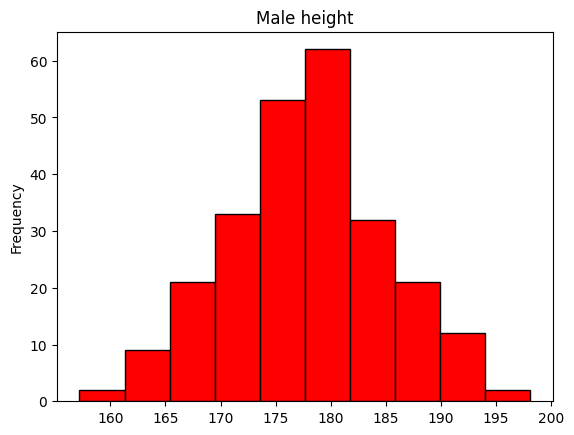

In [8]:
import matplotlib.pyplot as plt

# %matplotlilb sets up jupyter notebook for displaying plots created with Matplotlib
# inline speicifies that graphs produced by matplotlib should be displayed directly in the jupyter notebook 
%matplotlib inline

#  tells panda to create a plot of type histogram using the height data from the 'hgt' column of the 'mdims' DataFrame
mdims['hgt'].plot(kind='hist', color='red',edgecolor='black',linewidth=1,title='Male height')
plt.show();

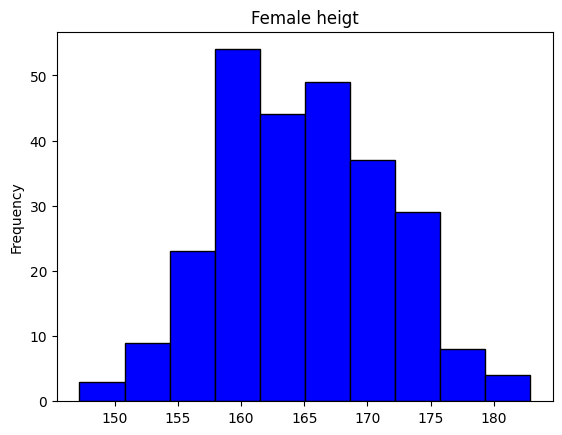

In [9]:
fdims['hgt'].plot(kind='hist', color='blue',edgecolor='black',linewidth=1,title='Female heigt')
plt.show();

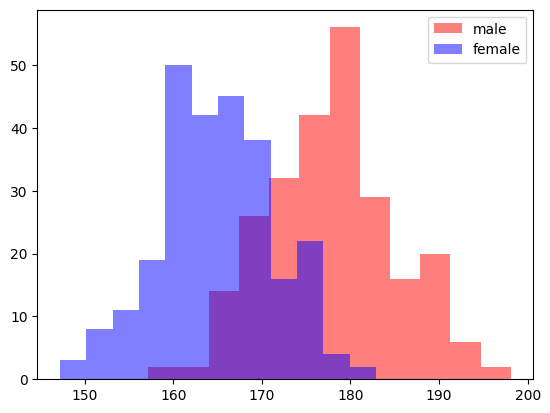

In [10]:
plt.hist(mdims['hgt'],color='red',alpha=0.5, bins=12, label='male')
plt.hist(fdims['hgt'],color='blue',alpha=0.5, bins=12,label='female')

# adds a legend to the plot with the specified location in the 'upper right' corner of the plotting area
plt.legend(loc='upper right')

# display the result figure
plt.show();

## The normal distribution

In your description of the distributions, did you use words like *bell-shaped or normal*? It's tempting to say so when faced with a unimodal symmetric distribution.

To see how accurate that description is, we can plot a normal distribution curve on top of a histogram to see how closely the data follow a normal distribution. This normal curve should have the same mean and standard deviation as the data. We'll be working with women's heights, so let's store them as a separate object and then calculate some statistics that will be referenced later.

In [11]:
fhgtmean = fdims['hgt'].mean()
fhgtsd = fdims['hgt'].std()

Next we make a density histogram to use as the backdrop and use the `seaborn.distplot()` function to overlay a normal probability curve. The difference between a frequency histogram and a density histogram is that while in a frequency histogram the heights of the bars add up to the total number of observations, in a density histogram the areas of the bars add up to 1. The area of each bar can be calculated as simply the height times the width of the bar. Using a density histogram allows us to properly overlay a normal distribution curve over the histogram since the curve is a normal probability density function. Frequency and density histograms both display the same exact shape; they only differ in their y-axis. You can verify this by comparing the frequency histogram you constructed earlier and the density histogram created by the commands below.

C:\Users\joych\AppData\Local\Temp\ipykernel_30556\3783200878.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fhgt_hist = sns.distplot(fdims['hgt'], norm_hist = True, kde = False, color = 'purple', bins = 8)


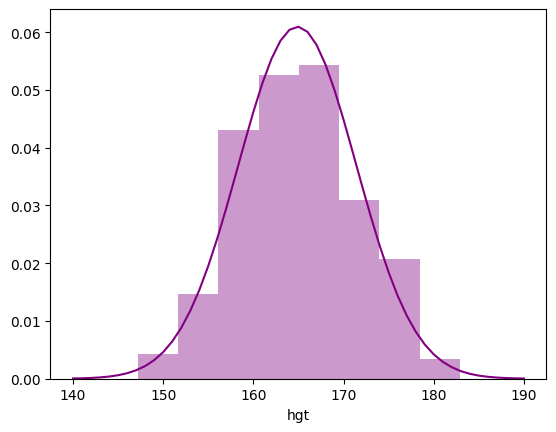

In [12]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline 
#plt.rcParams['figure.figsize'] = (6, 6)

fhgt_hist = sns.distplot(fdims['hgt'], norm_hist = True, kde = False, color = 'purple', bins = 8)
x = np.arange(140, 191)   
y = norm.pdf(x, loc = fhgtmean, scale = fhgtsd)                                                         
fhgt_hist.plot(x, y, 'purple');

After plotting the density histogram, we create the x- and y-coordinates for the normal curve. We chose the x range as 140 to 190 in order to span the entire range of women's heights. To create y, we use `norm.pdf()` from `scipy.stats` to calculate the density of each of those x-values in a distribution that is normal with mean (`fhgtmean`) and standard deviation (`fhgtsd`). The final command draws a curve on the existing density histogram by connecting each of the points specified by x and y. 

<div class = 'exercise'>
<h4>Exercise 2</h4>
Based on the this plot, does it appear that the data follow a nearly normal distribution?
</div>

## Evaluating the normal distribution

Eyeballing the shape of the histogram is one way to determine if the data appear to be nearly normally distributed, but it can be frustrating to decide just how close the histogram is to the curve. An alternative approach involves constructing a normal probability plot, also called a normal Q-Q plot for "quantile-quantile".

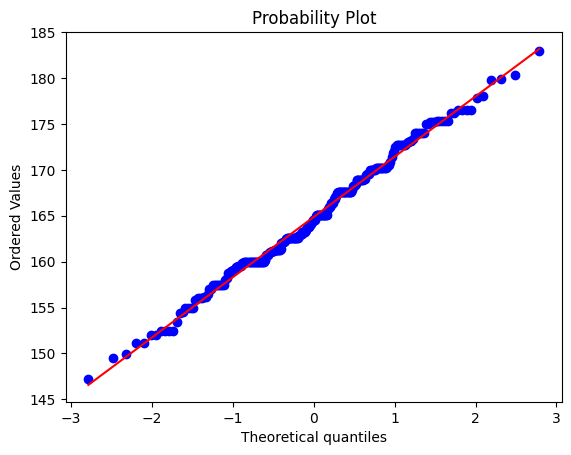

In [13]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(fdims['hgt'], plot = plt)
plt.show();

A data set that is nearly normal will result in a probability plot where the points closely follow the line. Any deviations from normality leads to deviations of these points from the line. The plot for female heights shows points that tend to follow the line but with some errant points towards the tails. We're left with the same problem that we encountered with the histogram above: how close is close enough?

A useful way to address this question is to rephrase it as: what do probability plots look like for data that I know came from a normal distribution? We can answer this by simulating data from a normal distribution using `numpy.random.normal()`.

In [14]:
import numpy as np

sim_norm = np.random.normal(size = len(fdims['hgt']), loc = fhgtmean, scale = fhgtsd)

The first argument indicates how many numbers you'd like to generate, which we specify to be the same number of heights in the  `fdims` data set using the `len()` function. The last two arguments (`loc` and `scale`) determine the mean and standard deviation of the normal distribution from which the simulated sample will be generated. We can take a look at the shape of our simulated data set,  `sim_norm`, as well as its normal probability plot.

Even better than comparing the original plot to a single plot generated from a normal distribution is to compare it to many more plots using the following function:

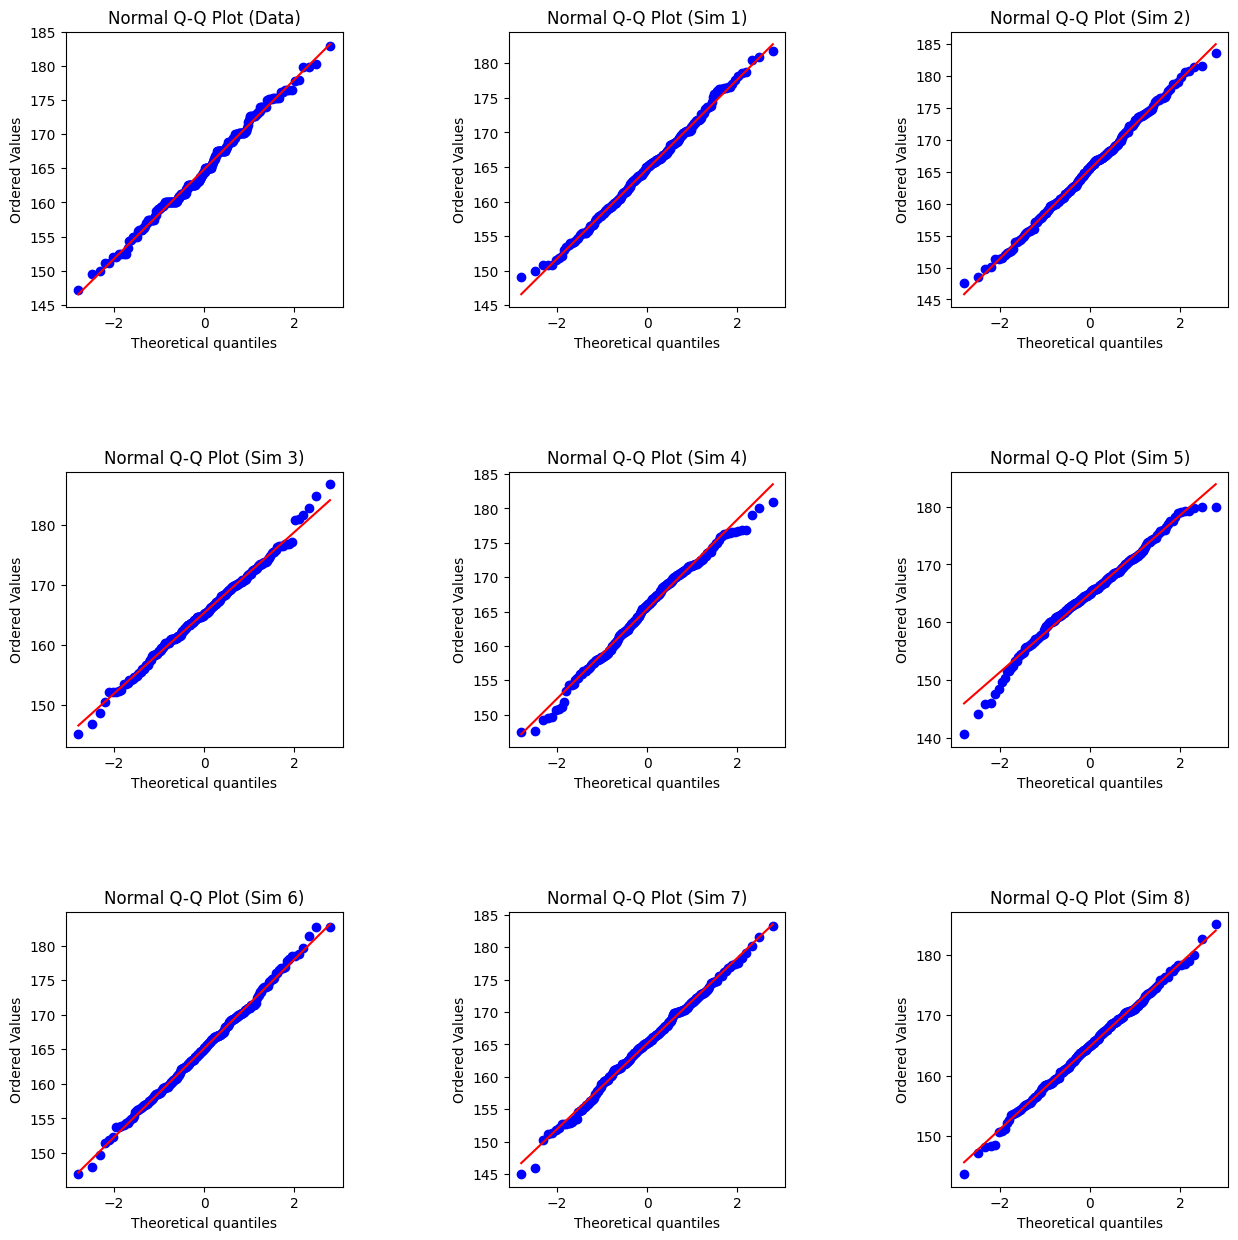

In [15]:
# draw random samples from a normal distribution eight times, 
# so we can construct eight different normal probability plots
sim_norm_8 = []
for i in range(8):
    sim_norm_8.append(np.random.normal(size = len(fdims['hgt']), loc = fhgtmean, scale = fhgtsd))

# compare the original plot to nine plots generated from a normal distribution.
plt.rcParams['figure.figsize'] = (15, 15)
plt.tight_layout(pad = 1) # adjust the subplots to fit in to the figure area.
plt.subplots_adjust(hspace = 0.6, wspace = 0.6) # adjust the amount of width and height reserved for space between subplots.

plt.subplot(3, 3, 1)
probplot(fdims['hgt'], plot = plt)
plt.title('Normal Q-Q Plot (Data)')

plt.subplot(3, 3, 2)
probplot(sim_norm_8[0], plot = plt)
plt.title('Normal Q-Q Plot (Sim 1)')

plt.subplot(3, 3, 3)
probplot(sim_norm_8[1], plot = plt)
plt.title('Normal Q-Q Plot (Sim 2)')

plt.subplot(3, 3, 4)
probplot(sim_norm_8[2], plot = plt)
plt.title('Normal Q-Q Plot (Sim 3)')

plt.subplot(3, 3, 5)
probplot(sim_norm_8[3], plot = plt)
plt.title('Normal Q-Q Plot (Sim 4)')

plt.subplot(3, 3, 6)
probplot(sim_norm_8[4], plot = plt)
plt.title('Normal Q-Q Plot (Sim 5)')

plt.subplot(3, 3, 7)
probplot(sim_norm_8[5], plot = plt)
plt.title('Normal Q-Q Plot (Sim 6)')

plt.subplot(3, 3, 8)
probplot(sim_norm_8[6], plot = plt)
plt.title('Normal Q-Q Plot (Sim 7)')

plt.subplot(3, 3, 9)
probplot(sim_norm_8[7], plot = plt)
plt.title('Normal Q-Q Plot (Sim 8)')

plt.show();

<div class = 'exercise'>
<h4>Exercise 3</h4>
Does the normal probability plot for <code>fdims['hgt']</code> look similar to the plots created for the simulated data? That is, do plots provide evidence that the female heights are nearly normal?
</div>

## Normal probabilities

Okay, so now you have a slew of tools to judge whether or not a variable is normally distributed. Why should we care?

It turns out that statisticians know a lot about the normal distribution. Once we decide that a random variable is approximately normal, we can answer all sorts of questions about that variable related to probability. Take, for example, the question of, "What is the probability that a randomly chosen young adult female is taller than 6 feet (about 182 cm)?" (The study that published this data set is clear to point out that the sample was not random and therefore inference to a general population is not suggested. We do so here only as an exercise.)

If we assume that female heights are normally distributed (a very close approximation is also okay), we can find this probability by calculating a Z score and consulting a Z table (also called a *normal probability table*). In Python, this is done in one step with the function `norm.cdf()` from `scipy.stats`.

In [16]:
from scipy.stats import norm

prob_using_Z = 1 - norm.cdf(182, loc = fhgtmean, scale = fhgtsd)
round(prob_using_Z, 4)

0.0044

Note that the function `norm.cdf()` gives the area under the normal curve below a given value, with a given mean and standard deviation. Since we're interested in the probability that someone is taller than 182 cm, we have to take one minus that probability.

Assuming a normal distribution has allowed us to calculate a theoretical probability. If we want to calculate the probability empirically, we simply need to determine how many observations fall above 182 then divide this number by the total sample size.

In [17]:
prob_using_theoretical = (sum(fdims['hgt'] > 182) / len(fdims['hgt']))
round(prob_using_theoretical, 4)

0.0038

Although the probabilities are not exactly the same, they are reasonably close. The closer that your distribution is to being normal, the more accurate the theoretical probabilities will be.

---
## On Your Own (optional thought exercise)

<ol>
    <li>Now let's consider some of the other variables in the body dimensions data set. Using the figures at the end of the exercises, match the histogram to its normal probability plot. All of the variables have been standardized (first subtract the mean, then divide by the standard deviation), so the units won't be of any help. If you are uncertain based on these figures, generate the plots with Python to check.</li><br>
    <ul>
        <li>The histogram for female biiliac (pelvic) diameter (<code>bii.di</code>) belongs to normal probability plot letter ____.</li>
        <li>The histogram for female elbow diameter (<code>elb.di</code>) belongs to normal probability plot letter ____.</li>
        <li>The histogram for general age (<code>age</code>) belongs to normal probability plot letter ____.</li>
        <li>The histogram for female chest depth (<code>che.de</code>) belongs to normal probability plot letter ____.</li>
    </ul><br>
    <li>Note that normal probability plots C and D have a slight stepwise pattern. Why do you think this is the case?</li><br>
    <li>As you can see, normal probability plots can be used both to assess normality and visualize skewness. Make a normal probability plot for female knee diameter (<code>kne.di</code>). Based on this normal probability plot, is this variable left skewed, symmetric, or right skewed? Use a histogram to confirm your findings.</li><br>
</ol>
<img src='https://github.com/vaksakalli/stats_tutorials/blob/master/histQQmatch.png?raw=true'>
